# <img src="https://media.licdn.com/dms/image/C560BAQFSfHi3lzdr_w/company-logo_200_200/0?e=1551916800&v=beta&t=zZWVoV8pmtf6BE1Ymii3asKp5AGmcJrCrrFM3HGK_N8" alt="Smiley face" height="20" width="30">   Virtual Carer for teenagers with body dysmorphic disorder

---

This project is property  the  Serendeepia Research company  (http://serendeepia.com/),  which   wishes make avaible  the results obtained  by the students of the artificial intelligence magister of the University Internacional de la Rioja  to all community . The main target this virtual carer is detect the emotions in the facials expression  to star a therapy agree the emotions that show the teeanagers that suffer this disorder.

> The procedure that it show 	involves two standpoints where it training with datasets for **Facial Expression Recognition  and  Facial Keypoints Detection**, you can find more detais:


> <table width="100%" >
	<tbody>
		<tr>
			<td align="center"><img src="https://storage.googleapis.com/kaggle-competitions/kaggle/3364/logos/front_page.png"> </td>
			<td align="center"><img src="https://storage.googleapis.com/kaggle-competitions/kaggle/3486/logos/front_page.png "></td>
		</tr>
		<tr>
			<td align="center"> [facial expression recognition](https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data)</td>
			<td align="center">[facial keypoints detection ](https://www.kaggle.com/c/facial-keypoints-detection)</td>
		</tr>
	</tbody>
</table>

> Likewise the web page of the framework de google   [ <img src="https://www.tensorflow.org/images/tf_logo_social.png?hl=es" width="20">   "tensorflow" ](https://www.tensorflow.org/tutorials/keras/basic_classification)it was of  great help for create the models.








##  <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQmst8FZSKtzJjn0mB6JFxtqGqnmSv4hiVKc_5CEZufATzAX7GR" alt="Smiley face" height="20" width="30">   The work plan (First Phase)

---



><table  width="100%">
	<tbody>
		<tr>
			<td width="70%">
        

1.   Preparing the development environment 
        
    * Prepare drive virtual of google drive.
        
    * Import libraries
        
*  Import the dataset "facial expression recognition" and Explore the data
        
    *   Download Dataset** facial expression recognition**.
        
    *   Import Dataset ** facial expression recognition**.
        
    *   Exploration and understanding the information that content in the dataset .
        
*   Change the format of the data set to be compatible with the model of artificial intelligence.
        
*   Training and Test set
        
*   Create the model and trainnig.
        
 *   Plot the resul of the accuracy , loss  and  matrix confussion. 

        
 </td>
			<td align="right"><a href="https://upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Data_visualization_process_v1.png/350px-Data_visualization_process_v1.png"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Data_visualization_process_v1.png/350px-Data_visualization_process_v1.png" width="200px"> </a></td>
		</tr>
	</tbody>
</table>





>>### 1.   	Preparing the development environment


---




In [2]:
# Google Colaboratory requires authorization for access your drive run the next code for get the security code.
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
# libraries for formating , cleaning and treatment of the datasets
import pandas as pd
import numpy as np
import collections
import itertools
# libraries for run neural network with keras and tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import MaxPooling2D,  BatchNormalization,  GlobalAveragePooling2D
from keras.layers.convolutional import Conv2D
from keras.optimizers import Adam, SGD, Adamax
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import tensorflow as tf
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from keras import optimizers

# libraries to graph the models results 
import matplotlib
import matplotlib.pyplot as plt

# Rezise image
from skimage.transform import rescale, resize, downscale_local_mean
from skimage import io


Using TensorFlow backend.


In [0]:
# declaration of functions to graph the dataset images 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matrix de Confusion',
                          cmap=plt.cm.Blues):

    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('Original')
    plt.xlabel('Predicciones')


def plot_acc(history, title="Model Accuracy"):
    """Imprime una gráfica mostrando la accuracy por epoch obtenida"""
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    
    
def plot_loss(history, title="Model Loss"):
    """Imprime una gráfica mostrando la pérdida por epoch obtenida"""
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper right')
    plt.show()


def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap="gray")
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
               color=color)


>>### 2.   Import the dataset "facial expression recognition" and 	Explore the data


---

>> You should download the dataset [here](https://www.kaggle.com/c/3364/download-all) and you should upload the file **·"fer2013.csv"** in your drive.

In [0]:
# Using the library pandas you can import the file csv
dataset_facial_expression = pd.read_csv("/content/gdrive/My Drive/fer2013.csv")


In [6]:
# display the top five
dataset_facial_expression.head()


,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [7]:
# display the last five
dataset_facial_expression.tail()


,emotion,pixels,Usage
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest
35886,2,19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...,PrivateTest


In [8]:
# Summary statistics: Numeric data
dataset_facial_expression.describe()


,emotion
count,35887.000000
mean,3.323265
std,1.873819
min,0.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,6.000000


In [9]:
type(dataset_facial_expression)


pandas.core.frame.DataFrame

In [10]:
len(dataset_facial_expression)


35887

In [11]:
dataset_facial_expression.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
emotion    35887 non-null int64
pixels     35887 non-null object
Usage      35887 non-null object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


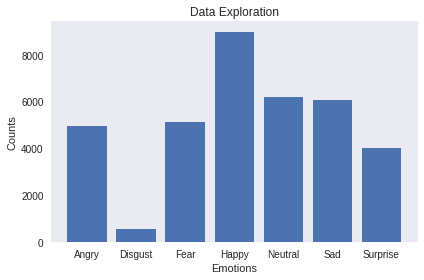

,emotion,count
3,Happy,8989
6,Neutral,6198
4,Sad,6077
2,Fear,5121
0,Angry,4953
5,Surprise,4002
1,Disgust,547


In [12]:
delais_emotion_label = ("Happy", "Neutral", "Sad",
                        "Fear", "Angry", "Surprise", "Disgust")
delais_emotion = pd.DataFrame(data=dataset_facial_expression["emotion"]
                              .value_counts())
delais_emotion["count"] = delais_emotion["emotion"]
delais_emotion["emotion"] = delais_emotion_label
delais_emotion

%matplotlib inline
fig, ax = plt.subplots()
ax.bar(delais_emotion["emotion"], delais_emotion["count"])
ax.set_title("Data Exploration")
ax.set_ylabel("Counts")
ax.set_xlabel("Emotions")
ax.grid()
fig.tight_layout()
plt.show()
delais_emotion


>### (Bonus) Exploration Result 
>Once exploration finish,it look that the dataset is completely clean, it have labels that identify which are the data of training, of test and of private test. Likewise it is noted that the dataset have seven labels of the a which the label "Disgust" there are five thousand forty seven records, this is very little compared with the rest labels and maybe the machine learn bad this example. The dataset must change the format at present the information have a dimension of (35887 , 3) for the model it must a dimension of (35887 , 48 ,48) that only have the image with the real size, the column  the emotions is a set aside that the algorithm of tensorflow relate only in the training. 

>>### 3.   Change the format of the data set to be compatible with the model of artificial intelligence.


---



In [0]:
# A loop starts for matrix with correct dimension for the model
y = np.zeros((35887, 48, 48))
for i in range(35887):
    imagen = dataset_facial_expression["pixels"][0+i]
    imagen_list_pixel = imagen.split(" ")
    imagen_array_pixel = np.asarray(imagen_list_pixel, dtype=float)
    imagen_rezise_pixel = imagen_array_pixel.reshape(-1, 48, 48)
    y[i] = y[i]+imagen_rezise_pixel[0]


>>### 4.   Training and Test set


---


In [14]:
# it is checked how many types of labels there are in which set
train_labels = np.array(dataset_facial_expression["emotion"][:28710])
test_labels = np.array(dataset_facial_expression["emotion"][28711:32299])
validation_labels = np.array(dataset_facial_expression["emotion"][32300:])

print("Validation Labels = " + str(collections.Counter(validation_labels)))
print("Test Labels = " + str(collections.Counter(test_labels)))
print("Train Labels = " + str(collections.Counter(train_labels)))


Validation Labels = Counter({3: 879, 6: 626, 4: 594, 2: 528, 0: 490, 5: 415, 1: 55})
Test Labels = Counter({3: 895, 4: 653, 6: 607, 2: 496, 0: 467, 5: 415, 1: 55})
Train Labels = Counter({3: 7215, 6: 4965, 4: 4830, 2: 4097, 0: 3996, 5: 3171, 1: 436})


In [0]:
# it is divided the dataset for the training
train_images = y[:28710]
train_labels = np.array(dataset_facial_expression["emotion"][:28710])
test_images = y[28711:]
test_images2 = y[28711:]
test_labels = np.array(dataset_facial_expression["emotion"][28711:])
test_labels2 = np.array(dataset_facial_expression["emotion"][28711:])
validation_images = y[32300:]
validation_labels = np.array(dataset_facial_expression["emotion"][32300:])
train_images = train_images.astype("float32")
test_images = test_images.astype("float32")
train_images /= 255
test_images /= 255


>> **for confirm that procedure is correct, I graph the images with his labels**

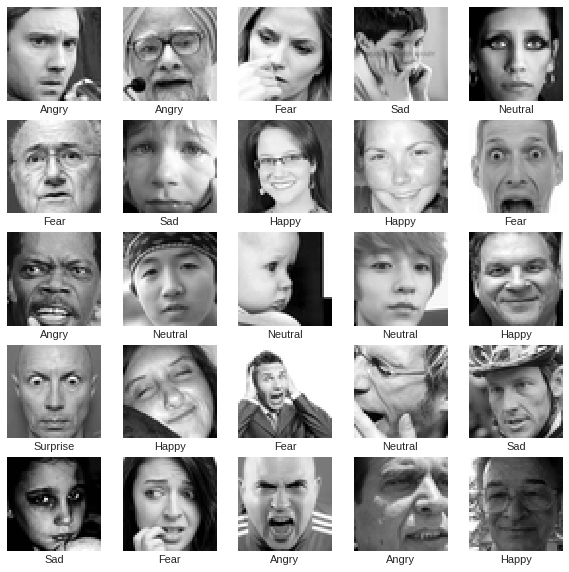

In [16]:
class_names = ["Angry", "Disgust", "Fear",
               "Happy", "Sad", "Surprise", "Neutral"]
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap="gray")
    plt.xlabel(class_names[train_labels[i]])


>>### 5.   Build the model and trainnig


---

>> Here it is creating the neural network convolutional with 24 layer and 960 filters for extract all features possibles of the images. 

In [17]:
# the variables is initialized
input_shape = (48, 48, 1)
batch_size = 128
num_classes = 7
epochs = 10
# convert class vectors to binary class matrices
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)
validation_labels = keras.utils.to_categorical(validation_labels, num_classes)
# Reshape the training and test set
train_images = train_images.reshape(28710, 2304)
test_images = test_images.reshape(7176, 2304)
train_images = train_images.reshape(train_images.shape[0], 48, 48, 1)
test_images = test_images.reshape(test_images.shape[0], 48, 48, 1)
# Setup the layers
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.6))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(512, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.6))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 46, 46, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 23, 23, 64)        18496     
__________

>>**Compile and Train  the model**


In [18]:
MAP_CHARACTERS = {0: "Angry", 1: "Disgust", 2: "Fear",
                  3: "Happy", 4: "Sad", 5: "Surprise", 6: "Neutral"}
opt = Adamax(lr=0.0001)

model.compile(loss='categorical_crossentropy',
              optimizer=opt, metrics=['accuracy'])
datagen = keras.preprocessing.image.ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        vertical_flip=False)

datagen.fit(train_images)

history = model.fit_generator(datagen.flow(train_images, train_labels,
                              batch_size=batch_size),
                              steps_per_epoch=18 *
                              (len(train_images) / batch_size),
                              epochs=epochs, validation_data=(test_images,
                              test_labels),
                              nb_val_samples=0.2)


# Evaluate Model
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

score = model.evaluate(test_images, test_labels, verbose=0)
print('\nKeras CNN #3B - accuracy:', score[1])
print('')
# Make predictions
y_pred = model.predict(test_images)
print('\n', metrics.classification_report(np.where(test_labels > 0)[1],
                                          np.argmax(y_pred, axis=1),
                                          target_names=list
                                          (MAP_CHARACTERS.values())), sep='')
Y_pred_classes = np.argmax(y_pred, axis=1)
Y_true = np.argmax(test_labels, axis=1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=4037.34375, epochs=10, validation_data=(array([[[..., validation_steps=0.2)`


Epoch 1/10
4038/4037 [==============================] - 338s 84ms/step - loss: 1.7158 - acc: 0.3079 - val_loss: 1.4931 - val_acc: 0.4332
Epoch 2/10
4038/4037 [==============================] - 332s 82ms/step - loss: 1.4694 - acc: 0.4329 - val_loss: 1.2800 - val_acc: 0.5093
Epoch 3/10
4038/4037 [==============================] - 332s 82ms/step - loss: 1.3163 - acc: 0.4969 - val_loss: 1.1615 - val_acc: 0.5564
Epoch 4/10
4038/4037 [==============================] - 332s 82ms/step - loss: 1.2162 - acc: 0.5376 - val_loss: 1.0906 - val_acc: 0.5875
Epoch 5/10
4038/4037 [==============================] - 333s 82ms/step - loss: 1.1468 - acc: 0.5641 - val_loss: 1.0560 - val_acc: 0.6028
Epoch 6/10
4038/4037 [==============================] - 333s 82ms/step - loss: 1.0951 - acc: 0.5856 - val_loss: 1.0123 - val_acc: 0.6236
Epoch 7/10
4038/4037 [==============================] - 333s 82ms/step - loss: 1.0534 - acc: 0.6024 - val_loss: 1.0002 - val_acc: 0.6297
Epoch 8/10
4038/4037 [===================

>>**Plot the resul of the accuracy , loss and matrix confussion.**

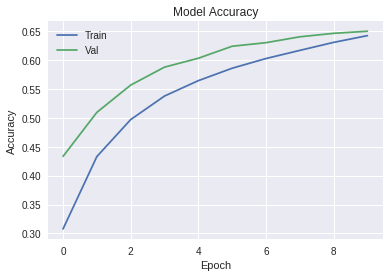

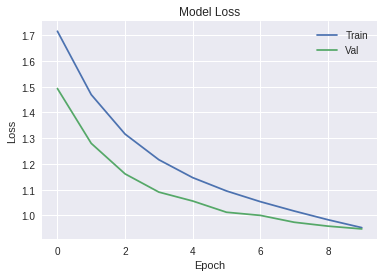

In [19]:
plt.subplot(1, 1, 1)
plot_acc(history)
plt.subplot(1, 1, 1)
plot_loss(history)


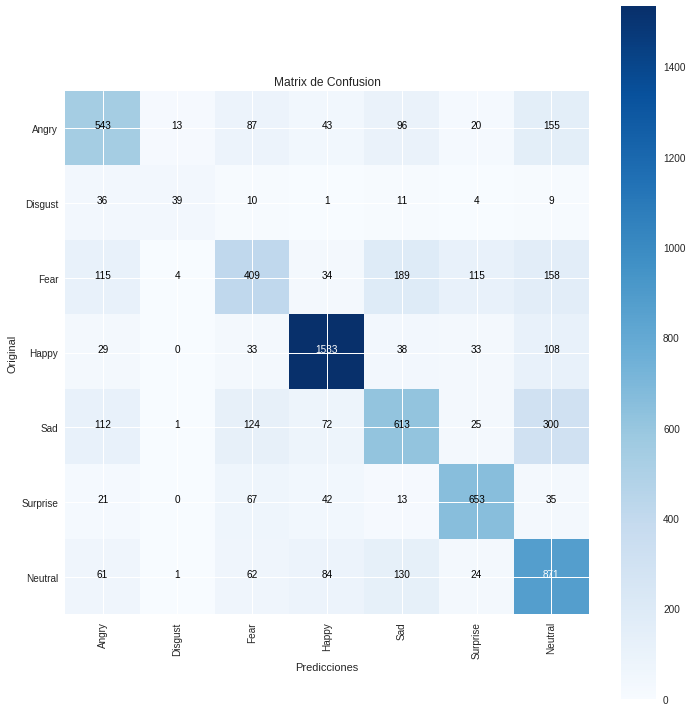

In [20]:
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
plot_confusion_matrix(confusion_mtx, classes=list(MAP_CHARACTERS.values()))


In [0]:
model.save("/content/gdrive/My Drive/Colab Notebooks/model.h5")
model.save_weights('/content/gdrive/My Drive/Colab Notebooks/my_model_weights.h5')


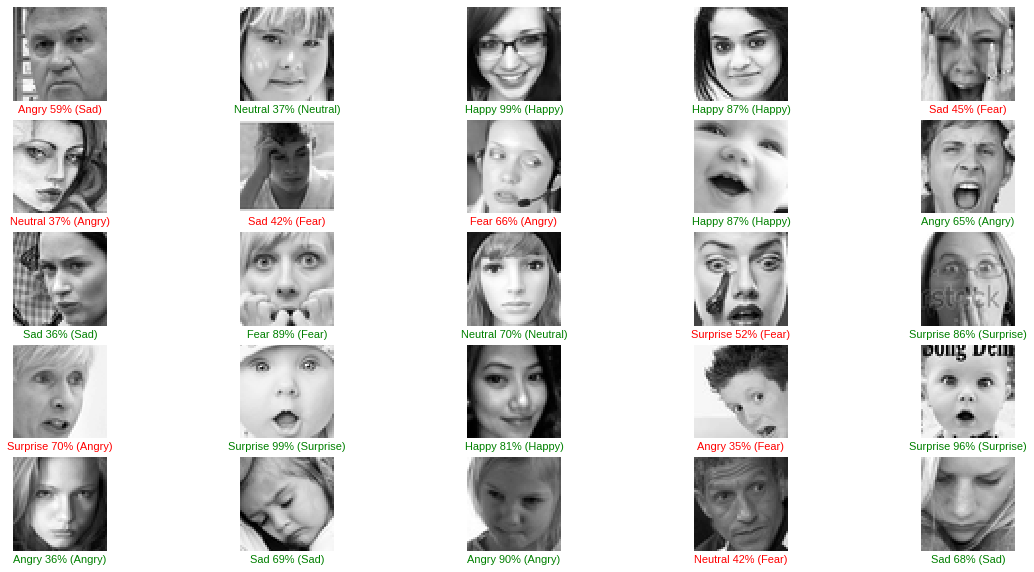

In [22]:
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, y_pred, test_labels2, test_images2)


##  <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQmst8FZSKtzJjn0mB6JFxtqGqnmSv4hiVKc_5CEZufATzAX7GR" alt="Smiley face" height="20" width="30">   The work plan (Second Phase)

---

>*   Prepare drive virtual of google drive.
*   Download Dataset** facial keypoints detection**.
*   Import Dataset ** facial keypoints detection**.
*   Exploration and understanding the information that content in the dataset .
*   Create the model and trainnig.
*   Plot the resul of the accuracy , loss  and  matrix confussion. 


In [23]:
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/training.csv')
test = df[6000:]
df=df[:6000]
test.shape

(1049, 31)

In [0]:
%matplotlib inline

def string2image(string):
    """Converts a string to a numpy array."""
    return np.array([int(item) for item in string.split()]).reshape((96, 96))

def plot_faces(nrows=5, ncols=5):
    """Randomly displays some faces from the training data."""
    selection = np.random.choice(df.index, size=(nrows*ncols), replace=False)
    image_strings = df.loc[selection]['Image']
    fig, axes = plt.subplots(figsize=(10, 10), nrows=nrows, ncols=ncols)
    for string, ax in zip(image_strings, axes.ravel()):
        ax.imshow(string2image(string), cmap='gray')
        ax.axis('off')
                
def plot_faces_with_keypoints(nrows=5, ncols=5):
    """Randomly displays some faces from the training data with their keypoints."""
    selection = np.random.choice(df.index, size=(nrows*ncols), replace=False)
    image_strings = df.loc[selection]['Image']
    keypoint_cols = list(df.columns)[:-1]
    keypoints = df.loc[selection][keypoint_cols]
    fig, axes = plt.subplots(figsize=(10, 10), nrows=nrows, ncols=ncols)
    for string, (iloc, keypoint), ax in zip(image_strings, keypoints.iterrows(), axes.ravel()):
        xy = keypoint.values.reshape((15, 2))
        ax.imshow(string2image(string), cmap='gray')
        ax.plot(xy[:, 0], xy[:, 1], 'ro')
        ax.axis('off')
        
def plot_faces_with_keypoints_and_predictions(model, nrows=5, ncols=5, model_input='flat'):
    """Plots sampled faces with their truth and predictions."""
    selection = np.random.choice(np.arange(X.shape[0]), size=(nrows*ncols), replace=False)
    fig, axes = plt.subplots(figsize=(10, 10), nrows=nrows, ncols=ncols)
    for ind, ax in zip(selection, axes.ravel()):
        img = X_train[ind, :, :, 0]
        if model_input == 'flat':
            predictions = model.predict(img.reshape(1, -1))
        else:
            predictions = model.predict(img[np.newaxis, :, :, np.newaxis])
        xy_predictions = output_pipe.inverse_transform(predictions).reshape(15, 2)
        ax.imshow(img, cmap='gray')
        ax.plot(xy_predictions[:, 0], xy_predictions[:, 1], 'bo')
        ax.axis('off')

*  **Exploration and understanding the information that content in the dataset **

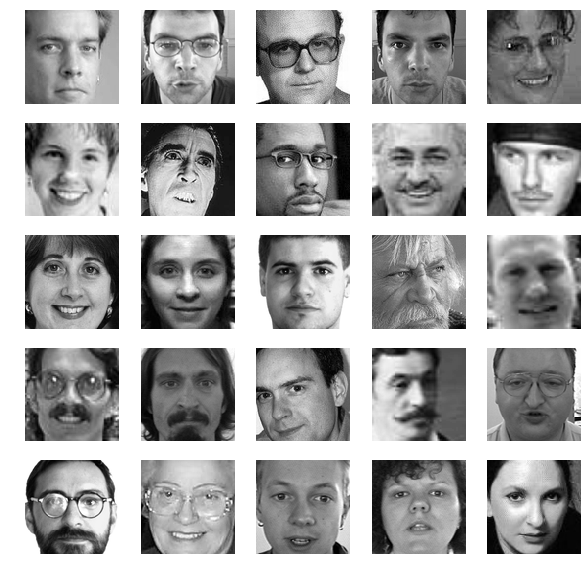

In [25]:
plot_faces()

In [26]:
keypoint_cols = list(df.columns)[:-1]
xy = df.iloc[0][keypoint_cols].values.reshape((15, 2))
len(xy)

15

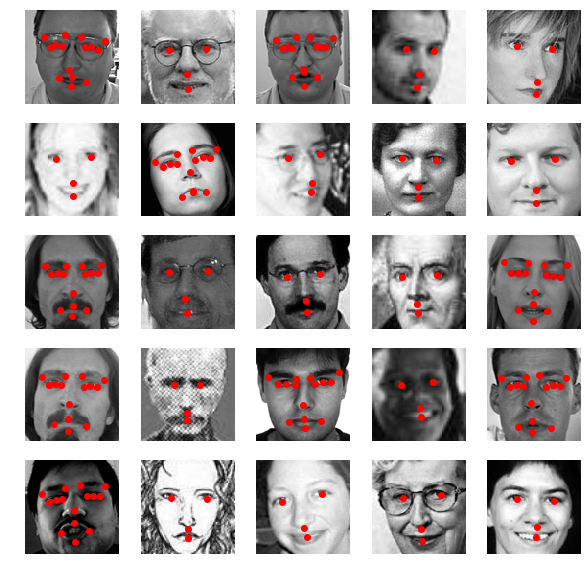

In [27]:
plot_faces_with_keypoints()

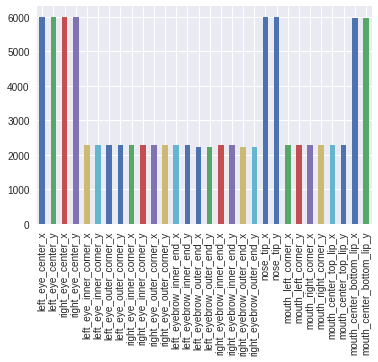

In [28]:
df.describe().loc['count'].plot.bar()

In [0]:
fully_annotated = df.dropna()
X = np.stack([string2image(string) for string in fully_annotated['Image']]).astype(np.float)[:, :, :, np.newaxis]
y = np.vstack(fully_annotated[fully_annotated.columns[:-1]].values)
X_train = X / 255.


In [0]:
output_pipe = make_pipeline(
    MinMaxScaler(feature_range=(-1, 1))
)

y_train = output_pipe.fit_transform(y)

*   **Create the model and trainnig.**

In [31]:
model2 = Sequential()
model2.add(Dense(100, activation="relu", input_shape=(96*96,)))
model2.add(Activation('relu'))
model2.add(Dense(30))
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               921700    
_________________________________________________________________
activation_9 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 30)                3030      
Total params: 924,730
Trainable params: 924,730
Non-trainable params: 0
_________________________________________________________________


In [32]:
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model2.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
epochs = 200
history = model2.fit(X_train.reshape(y_train.shape[0], -1), y_train, 
                 validation_split=0.2, shuffle=True, 
                 epochs=epochs, batch_size=20)



Train on 1712 samples, validate on 428 samples
Epoch 1/200
1712/1712 [==============================] - 1s 390us/step - loss: 0.0593 - acc: 0.2401 - val_loss: 0.0739 - val_acc: 0.0397
Epoch 2/200
1712/1712 [==============================] - 0s 281us/step - loss: 0.0366 - acc: 0.3213 - val_loss: 0.0699 - val_acc: 0.0654
Epoch 3/200
1712/1712 [==============================] - 0s 270us/step - loss: 0.0345 - acc: 0.3382 - val_loss: 0.0692 - val_acc: 0.0561
Epoch 4/200
1712/1712 [==============================] - 0s 270us/step - loss: 0.0336 - acc: 0.3598 - val_loss: 0.0695 - val_acc: 0.0514
Epoch 5/200
1712/1712 [==============================] - 0s 266us/step - loss: 0.0331 - acc: 0.3709 - val_loss: 0.0694 - val_acc: 0.0584
Epoch 6/200
1712/1712 [==============================] - 0s 271us/step - loss: 0.0324 - acc: 0.3989 - val_loss: 0.0684 - val_acc: 0.0771
Epoch 7/200
1712/1712 [==============================] - 0s 269us/step - loss: 0.0317 - acc: 0.4124 - val_loss: 0.0685 - val_acc: 0

* **Plot the resul of the accuracy and  loss.**

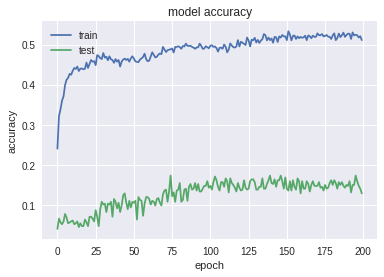

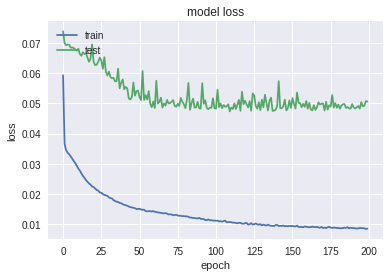

In [33]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
img = X_train[8, :, :, :].reshape(1, -1)
predictions = model2.predict(img)
xy_predictions = output_pipe.inverse_transform(predictions).reshape(15, 2)

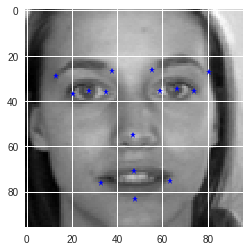

In [35]:
plt.imshow(X_train[8, :, :, 0], cmap='gray')
plt.plot( xy_predictions[:, 0], xy_predictions[:, 1], 'b*')

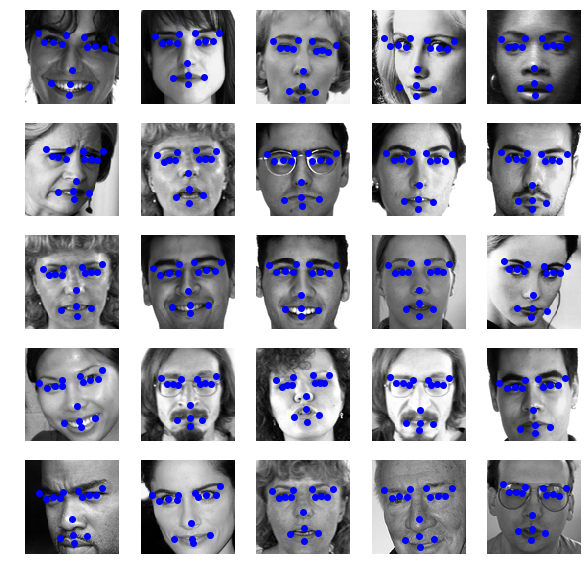

In [36]:
plot_faces_with_keypoints_and_predictions(model2)

##  <img src="https://previews.123rf.com/images/sdecoret/sdecoret1510/sdecoret151000091/46730345-ilustraci%C3%B3n-de-ensamblar-el-cubo-abstracto-de-bloques.jpg" alt="Smiley face" height="30" width="30">   Emsemble the two training models  (third Phase)


---

 <img src="https://3.bp.blogspot.com/-F4B9SjmV9GE/XAW1b4443bI/AAAAAAAAK80/wXulpNcb-l0Lu0eFpTiXPaarCS7gg9vWACLcBGAs/s1600/Captura.PNG">